In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Step 1: Data Loading and Preprocessing
data = pd.read_csv("C:\\Users\\User\\OneDrive\\Desktop\\sign_mnist_train.csv")


In [3]:

# Extracting features and labels
X = data.drop('label', axis=1).values
y = data['label'].values




In [4]:
# Normalizing the features
X = X / 255.0



In [5]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshaping the features for CNN input
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)



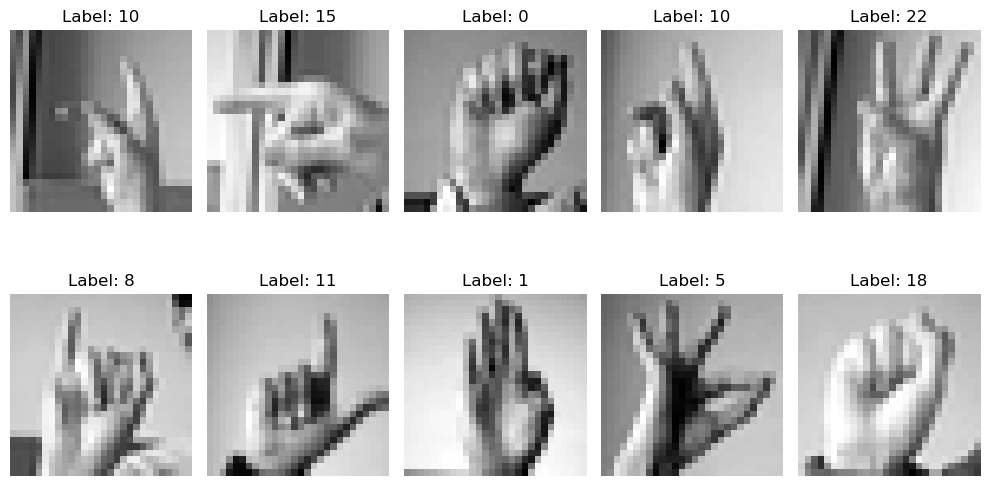

In [6]:
# Visualizing a few samples
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
# Step 2: Model Building
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])




C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Displaying the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 227,098 (887.10 KB)

 Trainable params: 227,098 (887.10 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Step 3: Model Training
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 0.4409 - loss: 1.9121 - val_accuracy: 0.9512 - val_loss: 0.2043
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.9684 - loss: 0.1322 - val_accuracy: 0.9985 - val_loss: 0.0242
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.9990 - loss: 0.0189 - val_accuracy: 0.9967 - val_loss: 0.0192
Epoch 4/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.9932 - loss: 0.0269 - val_accuracy: 0.9996 - val_loss: 0.0032
Epoch 5/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.9998 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 6/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 1.0000 - loss: 8.5833e-04 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 7/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 1.0000 - loss: 5.4810e-04 - val_accuracy: 1.0000 - val_loss: 7.2338e-04
Epoch 8/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 1.0000 - los

In [10]:
# Step 4: Model Evaluation
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')



172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 6.7211e-04
Test Accuracy: 1.0


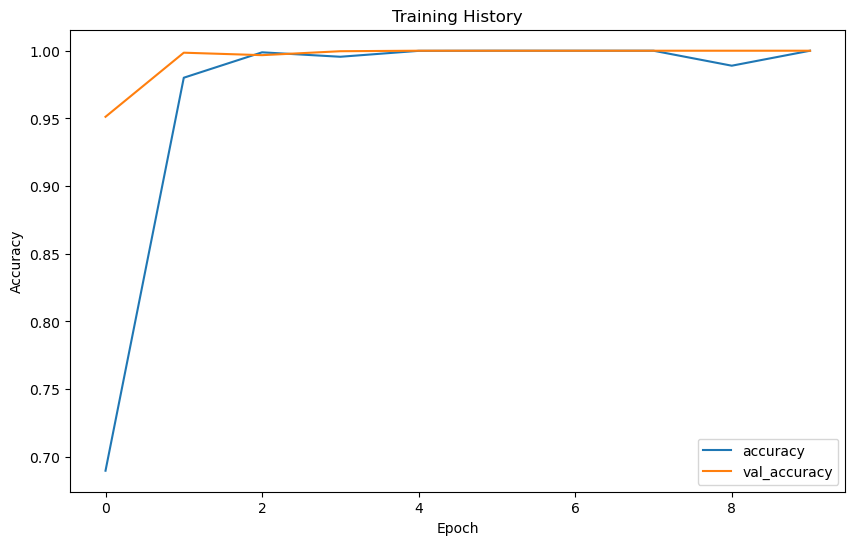

In [11]:
# Plotting the training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training History')
plt.show()




In [15]:
# Classification report
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

print(classification_report(y_test, y_pred))


172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       221
           1       1.00      1.00      1.00       188
           2       1.00      1.00      1.00       220
           3       1.00      1.00      1.00       256
           4       1.00      1.00      1.00       202
           5       1.00      1.00      1.00       242
           6       1.00      1.00      1.00       221
           7       1.00      1.00      1.00       205
           8       1.00      1.00      1.00       219
          10       1.00      1.00      1.00       219
          11       1.00      1.00      1.00       268
          12       1.00      1.00      1.00       232
          13       1.00      1.00      1.00       209
          14       1.00      1.00      1.00       219
          15       1.00      1.00      1.00       202
          16       1.00      1.00      1.00       291
          17       1.00      1.00      1

In [16]:
# Step 5: Deployment
model.save("sign_language_model.h5")
